# Logistic Regression from Scratch: Credit Default

- [Lab 1: Visualizing the Data ](#Credit-Default-Dataset:)
- [Lab 2: Logistic Regression from Scratch](#Logistic-Regression-from-Scratch)
- [Lab 3: Sklearn: LogisticRegression](#LogisticRegression-from-sklearn:)







### The objective is to create logistic regression implementation using NumPy. Implementing basic models is a great idea to improve your comprehension about how they work.

### I'm building a logistic regression from scratch and applying it with the Credit Default dataset, and then using Sklearn package for LogisticRegression to see if I get similar prediction results. This is just a toy exercice with teaching objectives.

### The simulated Customer default records from a made up credit card company. The simulated dataset is partially exported from package 'ISLR' from R with added on features such as: Age, LTI,  and Monthly Payments Delayed. 

### The data is made up and it is not applicable on any actual company. I'm interested in predicting whether an individual will default on his or her credit card payment, on the basis of annual income and monthly credit card balance. The statistical methods that I'm following through are based from "An Introduction to Statistical Learning with Applications in R"




In [1]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from numpy import linalg
import sklearn.linear_model as skl_lm
import statsmodels.api as sm
import statsmodels.formula.api as smf
df = pd.read_excel('Default.xlsx')

# Note: factorize() returns two objects: a label array and an array with the unique values.
# We are only interested in the first object. 
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]
df.head(3)

,ID,default,student,balance,income,Age,LTI,Months Delayed,default2,student2
0,1,No,No,729.526495,44361.625074,50.0,0.016445,0,0,0
1,2,No,Yes,817.180407,12106.134700,25.0,0.067501,0,0,1
2,3,No,No,1073.549164,31767.138947,39.0,0.033794,0,0,0


In [2]:
# removing zero LTI 
df = df[df['LTI']!= 0]
df.describe()

,ID,balance,income,Age,LTI,Months Delayed,default2,student2
count,38769.000000,3.876900e+04,3.876900e+04,38769.000000,38769.000000,38769.000000,38769.000000,38769.000000
mean,20294.451366,1.763397e+05,3.306138e+05,36.313789,0.661487,0.752973,0.168227,0.177281
std,11703.782878,3.284592e+05,3.707546e+05,11.120738,0.984303,1.365375,0.374073,0.381911
min,1.000000,-6.839980e+05,7.719677e+02,18.000000,-1.195993,0.000000,0.000000,0.000000
25%,10192.000000,9.335212e+02,4.535475e+04,27.000000,0.017096,0.000000,0.000000,0.000000
50%,20289.000000,1.854600e+04,1.589268e+05,34.000000,0.104561,0.000000,0.000000,0.000000
75%,30422.000000,2.107240e+05,5.283877e+05,44.000000,1.203949,1.000000,0.000000,0.000000
max,40598.000000,4.116080e+06,2.403507e+06,79.000000,38.364114,6.000000,1.000000,1.000000


###  Credit Default Dataset:

#### This dataset contains 8 classes of 38769 instances each, where the response default falls into one of two categories, Yes or No. Rather than modeling this response Y directly, logistic regression models the probability that Y belongs to a particular category.  

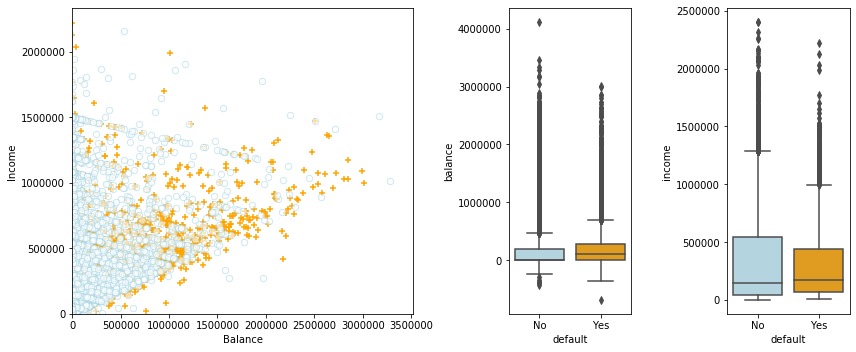

In [3]:
fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0,:-2])
ax2 = plt.subplot(gs[0,-2])
ax3 = plt.subplot(gs[0,-1])

# Take a fraction of the samples where target value (default) is 'no'
df_no = df[df.default2 == 0].sample(frac=0.15)
# Take all samples  where target value is 'yes'
df_yes = df[df.default2 == 1]
df_ = df_no.append(df_yes)

ax1.scatter(df_[df_.default == 'Yes'].balance, df_[df_.default == 'Yes'].income, s=40, c='orange', marker='+',
            linewidths=1)
ax1.scatter(df_[df_.default == 'No'].balance, df_[df_.default == 'No'].income, s=40, marker='o', linewidths='1',
            edgecolors='lightblue', facecolors='white', alpha=.6)

ax1.set_ylim(ymin=0)
ax1.set_ylabel('Income')
ax1.set_xlim(xmin=-100)
ax1.set_xlabel('Balance')

c_palette = {'No':'lightblue', 'Yes':'orange'}
sns.boxplot('default', 'balance', data=df, orient='v', ax=ax2, palette=c_palette)
sns.boxplot('default', 'income', data=df, orient='v', ax=ax3, palette=c_palette)
gs.tight_layout(plt.gcf())

#### The Credit Default data set. Left: The annual incomes and monthly credit card balances of a number of individuals. The individuals who defaulted on their credit card payments are shown in orange, and those who did not are shown in blue. Center: Boxplots of balance as a function of default status. Right: Boxplots of income as a function of default status.

#### Multiple Logistic Regression

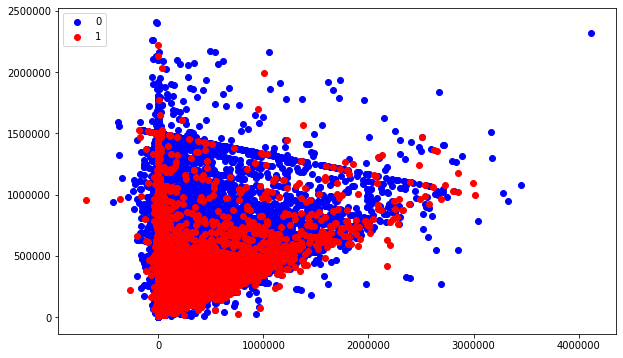

In [4]:


X = df[['balance','income', 'Age', 'LTI','Months Delayed', 'student2']].values
y = df.default2.values 
#y = (df.default2.values !=0) * 1


plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();



#  Logistic Regression from Scratch

### Given a set of inputs X ( 'balance','income', 'Age', 'LTI','Months Delayed', and 'student2')  , we want to assign them to one of two possible categories (0 or 1). Logistic regression models the probability that each input belongs to a particular category. A function takes inputs and returns outputs. To generate probabilities, logistic regression uses a function that gives outputs between 0 and 1 for all values of X.

In [5]:
class Logistic_Regression_scratch:
    def __init__(self, learning_rate=0.01, iterations=10000, fit_intercept=True, verbose=False):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def adding_on_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def sigmoid_function(self, z):
        return 1 / (1 + np.exp(-z))
    
    def loss_function(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.adding_on_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.iterations):
            z = np.dot(X, self.theta)
            h = self.sigmoid_function(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.learning_rate * gradient
            
            z = np.dot(X, self.theta)
            h = self.sigmoid_function(z)
            loss_function = self.loss_function(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss_function: {loss_function} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.adding_on_intercept(X)
    
        return self.sigmoid_function(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()
    
    
def shuffle_data(X, y, seed=None):
    """ Random shuffle of the samples in X and y """
    if seed:
        np.random.seed(seed)
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    return X[idx], y[idx]


def train_test_split(X, y, test_size=0.5, shuffle=True, seed=None):
    """ Split the data into train and test sets """
    if shuffle:
        X, y = shuffle_data(X, y, seed)
    # Split the training data from test data in the ratio specified in
    # test_size
    split_i = len(y) - int(len(y) // (1 / test_size))
    X_train, X_test = X[:split_i], X[split_i:]
    y_train, y_test = y[:split_i], y[split_i:]

    return X_train, X_test, y_train, y_test    

def accuracy_score(y_true, y_pred):
    """ Compare y_true to y_pred and return the accuracy """
    accuracy = np.sum(y_true == y_pred, axis=0) / len(y_true)
    return accuracy



In [6]:
def main(X,y):
    # Load the dataset
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    # Fit and predict using Logistic Regression 
    model = Logistic_Regression_scratch(learning_rate=0.1)

    %time model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print ("Accuracy:", accuracy)
    df_ = pd.DataFrame({'True default status': y_test,
                    'Predicted default status': y_pred})
    df_.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)

    df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')
    
    print(df_.groupby(['Predicted default status','True default status']).size().unstack('True default status'))



if __name__ == "__main__":
    main(X,y)
    

/Users/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/Users/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/Users/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


CPU times: user 37.5 s, sys: 2.74 s, total: 40.2 s
Wall time: 21.7 s
Accuracy: 0.7046017333883615
True default status         No  Yes
Predicted default status           
No                        6057  836
Yes                       2027  772


In [7]:
seed  = 8675309
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Fit and predict using model
model = Logistic_Regression_scratch(learning_rate=0.1)
%time model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print ("Accuracy:", accuracy)
df_ = pd.DataFrame({'True default status': y_test,
                'Predicted default status': y_pred})
df_.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)

df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

/Users/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/Users/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/Users/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


CPU times: user 40.2 s, sys: 3.08 s, total: 43.3 s
Wall time: 26.8 s
Accuracy: 0.836256706562113


True default status,No,Yes
Predicted default status,,
No,8105,1587


In [8]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score

'''Class_Report = pd.DataFrame(confusion_matrix(y_test, y_pred).T, index=model.classes_,
                     columns=model.classes_)
Class_Report.index.name = 'Predicted'
Class_Report.columns.name = 'True'
print(Class_Report)'''
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      8105
           1       0.00      0.00      0.00      1587

    accuracy                           0.84      9692
   macro avg       0.42      0.50      0.46      9692
weighted avg       0.70      0.84      0.76      9692



/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [9]:
model.theta

array([ 7.01615882e+00, -1.74725035e+03, -1.41000587e+04,  8.68039859e+01,
        2.89564499e+01,  1.16680784e+02,  3.13232280e+00])

In [ ]:
#preds = model.predict(X)
#(preds == y).mean()

In [ ]:

#accuracy = accuracy_score(y, preds)

#print ("Accuracy:", accuracy)
#df_ = pd.DataFrame({'True default status': y,
#                'Predicted default status': preds})
#df_.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)

#df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

ValueError: shapes (2500,3) and (7,) not aligned: 3 (dim 1) != 7 (dim 0)

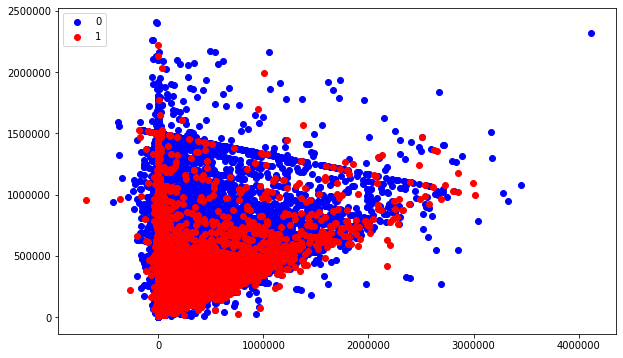

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

# LogisticRegression from sklearn:

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression(C=1e20)

In [13]:
%time model.fit(X, y)
model.intercept_, model.coef_

CPU times: user 138 ms, sys: 7.75 ms, total: 146 ms
Wall time: 153 ms


/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(array([-0.00096133]),
 array([[ 5.81361518e-07, -9.52940024e-07, -3.48697828e-02,
         -2.00217339e-04,  3.60586366e-04, -3.05915359e-04]]))

In [14]:
%time model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print ("Accuracy:", accuracy)
df_ = pd.DataFrame({'True default status': y_test,
                'Predicted default status': y_pred})
df_.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)

print(df_.groupby(['Predicted default status','True default status']).size().unstack('True default status'))
print(classification_report(y_test, y_pred))



CPU times: user 115 ms, sys: 3.47 ms, total: 118 ms
Wall time: 122 ms
Accuracy: 0.836256706562113
True default status         No   Yes
Predicted default status            
No                        8105  1587
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      8105
           1       0.00      0.00      0.00      1587

    accuracy                           0.84      9692
   macro avg       0.42      0.50      0.46      9692
weighted avg       0.70      0.84      0.76      9692



/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
preds = model.predict(X)
(preds == y).mean()

0.8317728081714773

In [16]:
model.intercept_, model.coef_

(array([-0.00095443]),
 array([[ 5.66416147e-07, -9.36609521e-07, -3.46620430e-02,
         -1.93435629e-04,  3.65870514e-04, -2.99657134e-04]]))

In [17]:
pred_p = model.predict_proba(X_test)
Class_Prob = pd.DataFrame({'True': y_test, 'Pred': pred_p[:,1] > .25})
Class_Prob.Pred.replace(to_replace={True:'Yes', False:'No'}, inplace=True)
print(Class_Prob.groupby(['True', 'Pred']).size().unstack('True').T)
print(classification_report(y_test, Class_Prob.Pred))

Pred    No   Yes
True            
0     5835  2270
1      996   591


TypeError: '<' not supported between instances of 'str' and 'int'

### If we trained our implementation with smaller learning rate and more iterations we would find approximately equal weights. But the more remarkably difference is about training time, sklearn is order of magnitude faster.

### Refreshers of mathematics terminology

Logistic regression is an estimation of the logitistic function. It is a binary response [0,1] outside of the interveral if using a linear function. We must use the logistic function within the zero and one boundary. This function creates a s-shaped curve with the probability estimate, for every increase by X one unit changes the log odds by Beta or multiples of Beta. 


### Logit Function:



/Users/michael/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line s

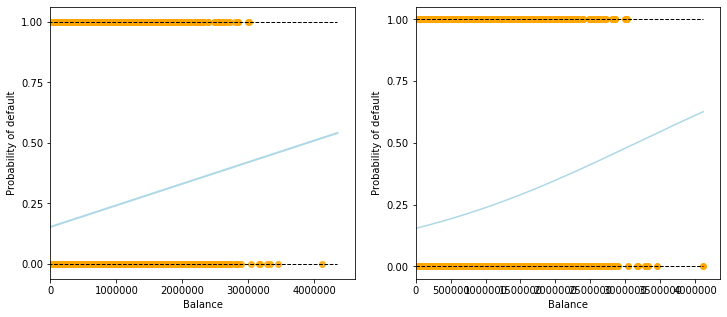

In [18]:
X_train = df.balance.values.reshape(-1,1) 
y = df.default2

# Create array of test data. Calculate the classification probability
# and predicted classification.
X_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)

clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(X_train,y)
prob = clf.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
# Left plot
sns.regplot(df.balance, df.default2, order=1, ci=None,
            scatter_kws={'color':'orange'},
            line_kws={'color':'lightblue', 'lw':2}, ax=ax1)
# Right plot
ax2.scatter(X_train, y, color='orange')
ax2.plot(X_test, prob[:,1], color='lightblue')

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_ylabel('Probability of default')
    ax.set_xlabel('Balance')
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.])
    ax.set_xlim(xmin=-100)

#### As you can see, the line search algorithm did not converge, which means I might have to increase max_iter parameter (max_iter default is 100) ; but have in mind that it is also possible that the Credit Default data simply can't be fit by a logistic model.  